# Ford GoBike trip data analysis
## by Souhail YOUSSEFI

## Preliminary Wrangling

> The dataset consists of 183412 bike riding records over 16 different informations of a bike sharing serive by Ford. Let's dive into it !

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')
# Let's have a look at the data frame. Called df1 because df will be the copy we will be cleaning.
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df1.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We can already see somethings to work on for the visualizations. We can transform birth year in age and convert it to int. We can also set member_gender, bike_share_for_all_trip and user_type to be categorical. Also, there are null values to get rid of!

In [5]:
#Let's have a look at min and max values
df1.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Some things seem weird :
* Max value of duration is equivalent to 23 hours ?
* Min value of birth year is 1844 which makes the max age at 143 ?

All of this will need some investigation through exploratory visualizations !

### What is the structure of the dataset?

The dataset consists of 183412 entries over 16 different informations gathered for each entry. Some of them contain null values.

### What is/are the main feature(s) of interest in the dataset?

The main features of interest are :
* Time and duration of rides
* Start and end station information
* Bike information
* User information

### What features in the dataset will help support your investigation into our features of interest?

It would be intersting to see what kind of usage is made with these bikes based on some of the categorical variables we will be creating. For example, we can also investigate the difference between subscribing or not. For the numerical variables seeing their distributions can shed some light over some interesting conclusions.

## Univariate Exploration

In this section, I will, focus on three numerical variables :
* Duration of ride
* Age
* Distance traveled

For each one, I will have a look at outliers through box plots and then this will help cleaning and setting the limits for a histogram plot to check distribution. I will after that draw a conclusion on each one of them.

### Cleaning the dataset

In [6]:
# Making a copy to clean

df = df1.copy()

In [7]:
# Removing rows with null values :
df = df.dropna()
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [8]:
# Check duplicates
sum(df.duplicated())

0

In [9]:
# Reset index
df = df.reset_index(drop=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


It would interesting to see the distribution of numerical variables? Let's start with one of them : distance

In [10]:
# Calculate distance traveled by trip based on location of start and end station
# source : https://www.movable-type.co.uk/scripts/latlong.html

from math import cos, sin, sqrt, atan2, radians

# Create a function that calculates distance
def distance(df):
    R = 6373 # in km
    lat1 = radians(df['start_station_latitude'])
    lat2 = radians(df['end_station_latitude'])
    long1 = radians(df['start_station_longitude'])
    long2 = radians(df['end_station_longitude'])
    deltalong = long2 - long1
    deltalat = lat2 - lat1
    a = (sin(deltalat/2))**2 + cos(lat1) * cos(lat2) * (sin(deltalong/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c 
    return d #in km

#Calculate distance
df['distance'] = df.apply(distance,axis=1)

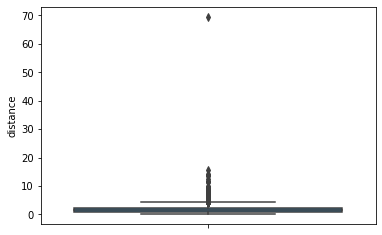

In [11]:
# Check max value of distance and see if the function works
sb.boxplot(data=df, y='distance');

70 km for a bike ride is a lot and a bit suspisicous for this kind of usage (city focused).

In [12]:
# Let's have a look at values over 15 km
df[df['distance'] > 15].head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
19102,2229,2019-02-26 15:11:44.5230,2019-02-26 15:48:54.3730,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2080,Subscriber,1989.0,Male,Yes,15.678876
106913,6945,2019-02-12 14:28:44.4020,2019-02-12 16:24:30.1580,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,4780,Subscriber,1985.0,Female,No,69.491049


In [13]:
# Let's focus on bike rides of less than 12 km distance traveled.
df = df[df['distance'] < 12]

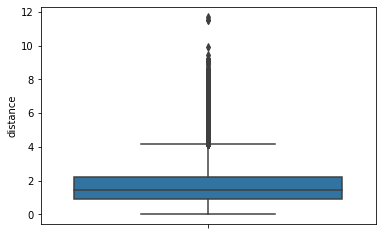

In [14]:
# Visual check
sb.boxplot(data=df, y='distance');

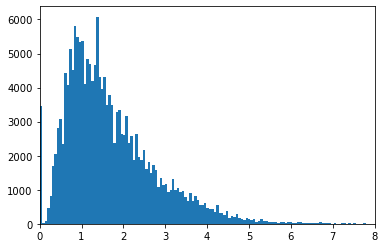

In [15]:
# Let's check the distribution of traveled distance now, we will keep it
# to max 8 km as box plot tell us that most values are under this value
plt.hist(data=df, x='distance', bins=200);
plt.xlim((0,8));

The values seem consistent with what a bike cruise would be. Most of the trips lay around 0 to 3 km distance with the longest being around 8km. Under 0.5 km, it seems like people do not bother taking the bike and maybe just walk.
We can also see that the distribution is right skewed which was an expected distribution. Also these values are consistent with reality so our distance calculation function works just fine !

How about the two other numerical variables ? Let's follow the same process

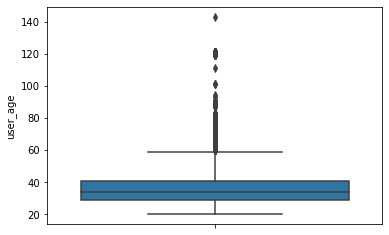

In [16]:
# First change birthyear by age and set in to int format
df['user_age'] = 2021 - df['member_birth_year'].astype(int)

# Check max value of age
sb.boxplot(data=df, y='user_age');

Some values are over 100 y-o which is non realistic, we need to filtrate the values. Let's focus people under 70.

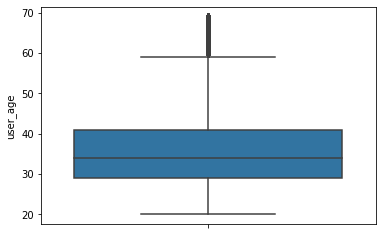

In [17]:
df = df[df['user_age'] < 70]
sb.boxplot(data=df, y='user_age');

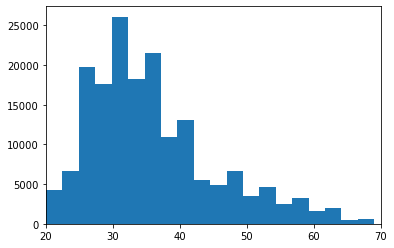

In [18]:
# Let's check the distribution now 
plt.hist(data=df, x='user_age', bins=20)
plt.xlim((20,70));

The distribution is right skewed which means that there are more young users. The maximum lays around 30.

How about the last numerical value : duration ?

In [19]:
# Let's first convert it from seconds to minutes
df['duration_min'] = df['duration_sec']/60

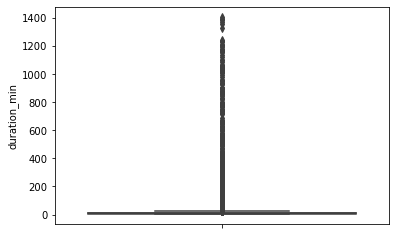

In [20]:
# Check max value of duration
sb.boxplot(data=df, y='duration_min');

In [21]:
(df['duration_min'].max())/60

23.485555555555557

This max value is non realistic. Maybe someone kept the bike for 23h, but they did not bike for 23h continuously for sure. Let's keep only the the trip that took less than 2 hours.

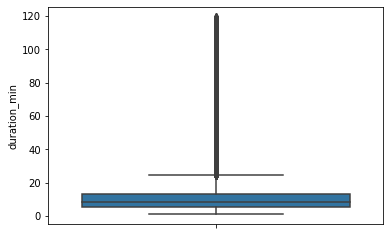

In [22]:
df = df[df['duration_min'] < 120]
sb.boxplot(data=df, y='duration_min');

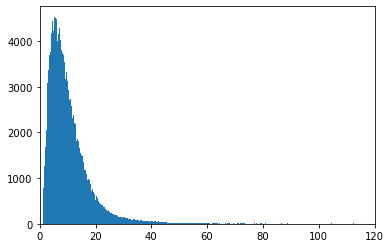

In [23]:
plt.hist(data=df, x='duration_min', bins=400)
plt.xlim((0,120));

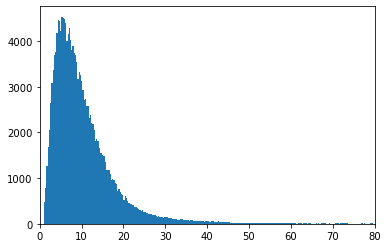

In [24]:
# Let's set the xlimit to 80 for better readability
plt.hist(data=df, x='duration_min', bins=400)
plt.xlim((0,80));

The distribution is right skewed too. The max count value is for bike rides around 6-8 minutes. What can the categorical variables tell us more ?

**Let's now convert the columns that we need in categorical type, maybe it would be interesting to compare them in terms of count**

In [25]:
# User_type conversion
df.user_type.value_counts()

Subscriber    157119
Customer       16261
Name: user_type, dtype: int64

In [26]:
user_type = df.user_type.value_counts().index.to_list()
user_type_class = pd.api.types.CategoricalDtype(ordered=True, categories=user_type)
df['user_type'] = df['user_type'].astype(user_type_class)

In [27]:
# Check that it worked dtype should be category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173380 entries, 3 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             173380 non-null  int64   
 1   start_time               173380 non-null  object  
 2   end_time                 173380 non-null  object  
 3   start_station_id         173380 non-null  float64 
 4   start_station_name       173380 non-null  object  
 5   start_station_latitude   173380 non-null  float64 
 6   start_station_longitude  173380 non-null  float64 
 7   end_station_id           173380 non-null  float64 
 8   end_station_name         173380 non-null  object  
 9   end_station_latitude     173380 non-null  float64 
 10  end_station_longitude    173380 non-null  float64 
 11  bike_id                  173380 non-null  int64   
 12  user_type                173380 non-null  category
 13  member_birth_year        173380 non-null  fl

In [28]:
# Same for member gender
df.member_gender.value_counts()

Male      129254
Female     40538
Other       3588
Name: member_gender, dtype: int64

In [29]:
member_gender = df.member_gender.value_counts().index.to_list()
member_gender_class = pd.api.types.CategoricalDtype(ordered=True, categories=member_gender)
df['member_gender'] = df['member_gender'].astype(member_gender_class)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173380 entries, 3 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             173380 non-null  int64   
 1   start_time               173380 non-null  object  
 2   end_time                 173380 non-null  object  
 3   start_station_id         173380 non-null  float64 
 4   start_station_name       173380 non-null  object  
 5   start_station_latitude   173380 non-null  float64 
 6   start_station_longitude  173380 non-null  float64 
 7   end_station_id           173380 non-null  float64 
 8   end_station_name         173380 non-null  object  
 9   end_station_latitude     173380 non-null  float64 
 10  end_station_longitude    173380 non-null  float64 
 11  bike_id                  173380 non-null  int64   
 12  user_type                173380 non-null  category
 13  member_birth_year        173380 non-null  fl

Now that the conversion is done let's try to answer some questions like :
* Is there more subscribers or customers ?
* Is there more male or female or other users ?
* Do people use the service more for the whole trip or just part of it ?

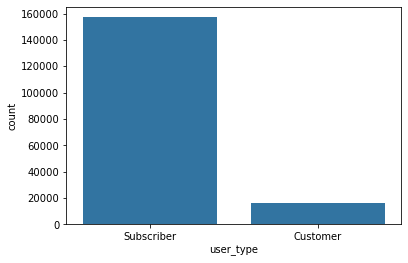

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color);

It looks like there is much more subscribers than customers. How about gender ?

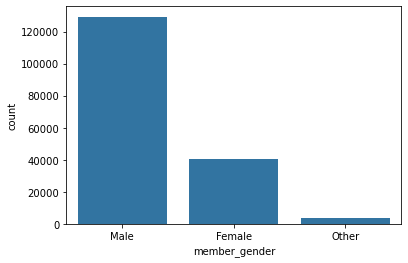

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='member_gender', color=base_color);

The service seems to attract more Male customers. What about the kind of bike ride (for the whole trip or not ?)

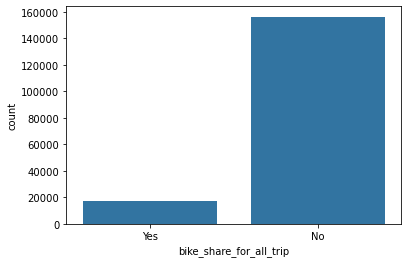

In [32]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='bike_share_for_all_trip', color=base_color);

Much more people would use the bike share as part of a multiple-transporation-options trip

In [33]:
# We should be having enough variables to work with for bivariate and multi variate exploration. 
# Let's drop the columns we won't use later
df =df.drop(columns=['duration_sec', 'start_station_latitude',
                 'start_station_longitude', 'end_station_latitude',
                 'end_station_longitude', 'member_birth_year'])

In [34]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173380 entries, 3 to 174951
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_time               173380 non-null  object  
 1   end_time                 173380 non-null  object  
 2   start_station_id         173380 non-null  float64 
 3   start_station_name       173380 non-null  object  
 4   end_station_id           173380 non-null  float64 
 5   end_station_name         173380 non-null  object  
 6   bike_id                  173380 non-null  int64   
 7   user_type                173380 non-null  category
 8   member_gender            173380 non-null  category
 9   bike_share_for_all_trip  173380 non-null  object  
 10  distance                 173380 non-null  float64 
 11  user_age                 173380 non-null  int32   
 12  duration_min             173380 non-null  float64 
dtypes: category(2), float64(4), int32(1), int64(

In [35]:
# Let's save this cleaned dataframe
df.to_csv('201902-fordgobike-tripdata_clean.csv', index=False)

## Bivariate Exploration

For this part, it would be interesting to answer questions like :
* Is there a relationship between user age and duration ? Maybe older people bike for less time due to the physical effort required?
* Same for user age and distance ?
* How about duration vs distance ? This should give insight about speed ?

Moreover, we will be investigating through loops all the possible combinations as part of the exploratory path.

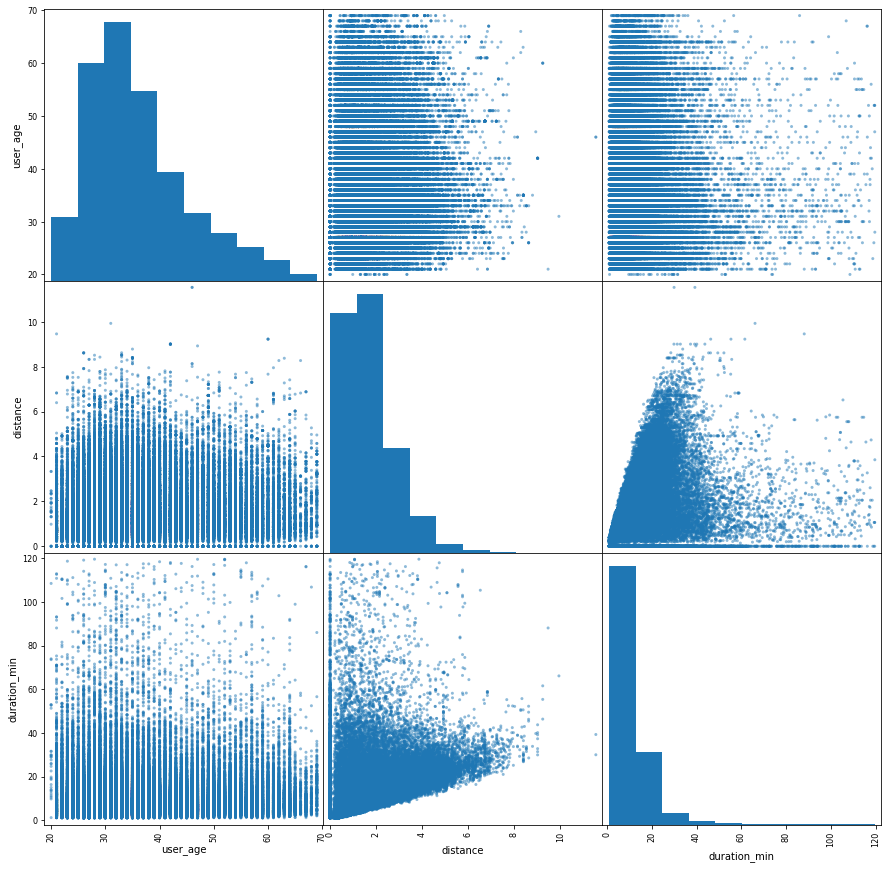

In [36]:
df2 = df[['user_age', 'distance', 'duration_min']]
pd.plotting.scatter_matrix(df2, figsize=(15,15), alpha=0.5);

We can notice lot of interesting trends between these 3 different features:

* User age vs duration : Here we can see a decrease of duration as the user's age increases.
* User age vs distance : Here we can see a decrease of distance as the user's age increases.
* Distance vs duration : few interesting trends :
  * First, we can see a clear line representing a limitation due to the speed of biking as a mode of transport (could also be related to speed limitation due to city usage (redlights...)
  * Second, we can see that as the duration increases, the distance does not increase indefinitely. For high values of duration, we see that distance between start and end station tend to be stable and do not increase.
  
All of this will be interesting to check in more details later. What if we looked in a broader way at all the combinations between one numerical and on categorical variable ?

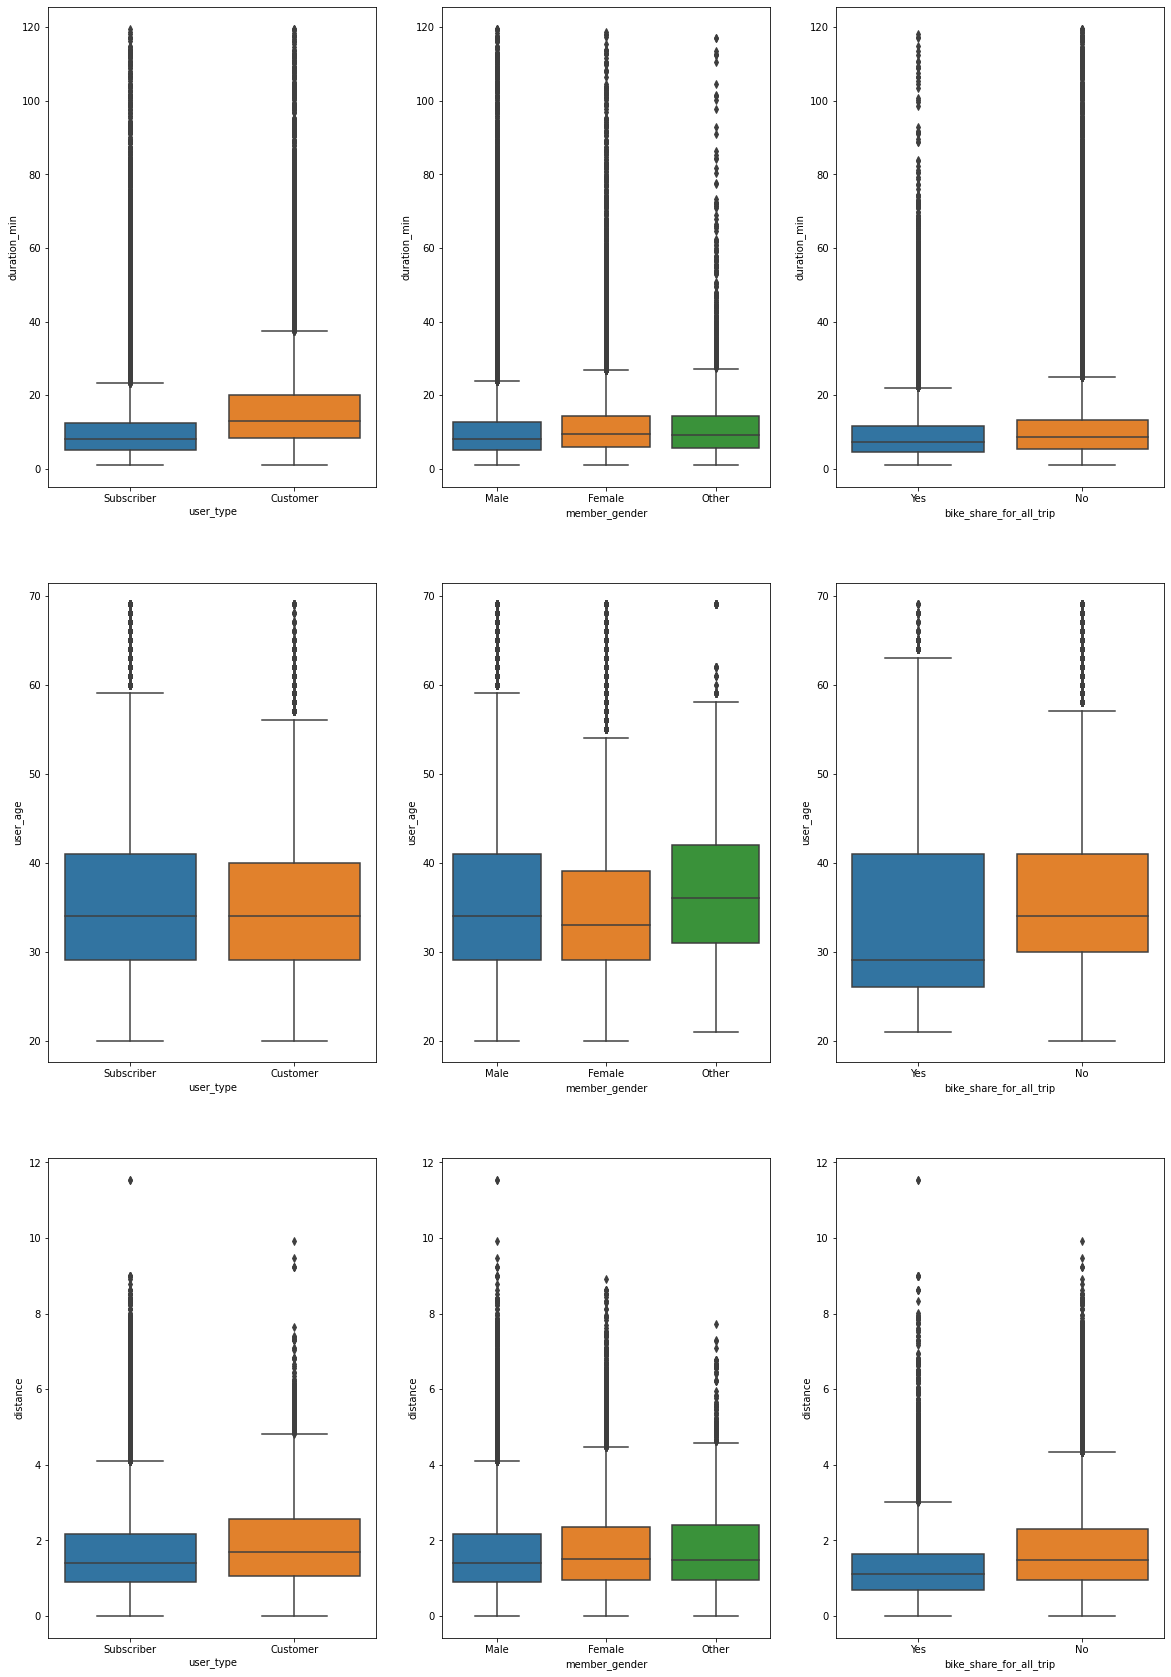

In [37]:
# Let's investigate every combination of one numeric variable with one categorical variable through box plots

numeric_variables = ['duration_min', 'user_age', 'distance']
categorical_variables = ['user_type', 'member_gender', 'bike_share_for_all_trip']
i=1
plt.figure(figsize = [20,30])
for nvariable in numeric_variables :
    for cvariable in categorical_variables :
        plt.subplot(3,3,i)
        sb.boxplot(data=df, x=cvariable, y=nvariable)
        i =i +1

The most interesting trends to analyse are the ones where there is difference between the different catergoy values.
In this case :
* user type vs duration
* biker share for all trip vs user age

Let's see with violon plots if by having the extra information of distribution we can have some insight.

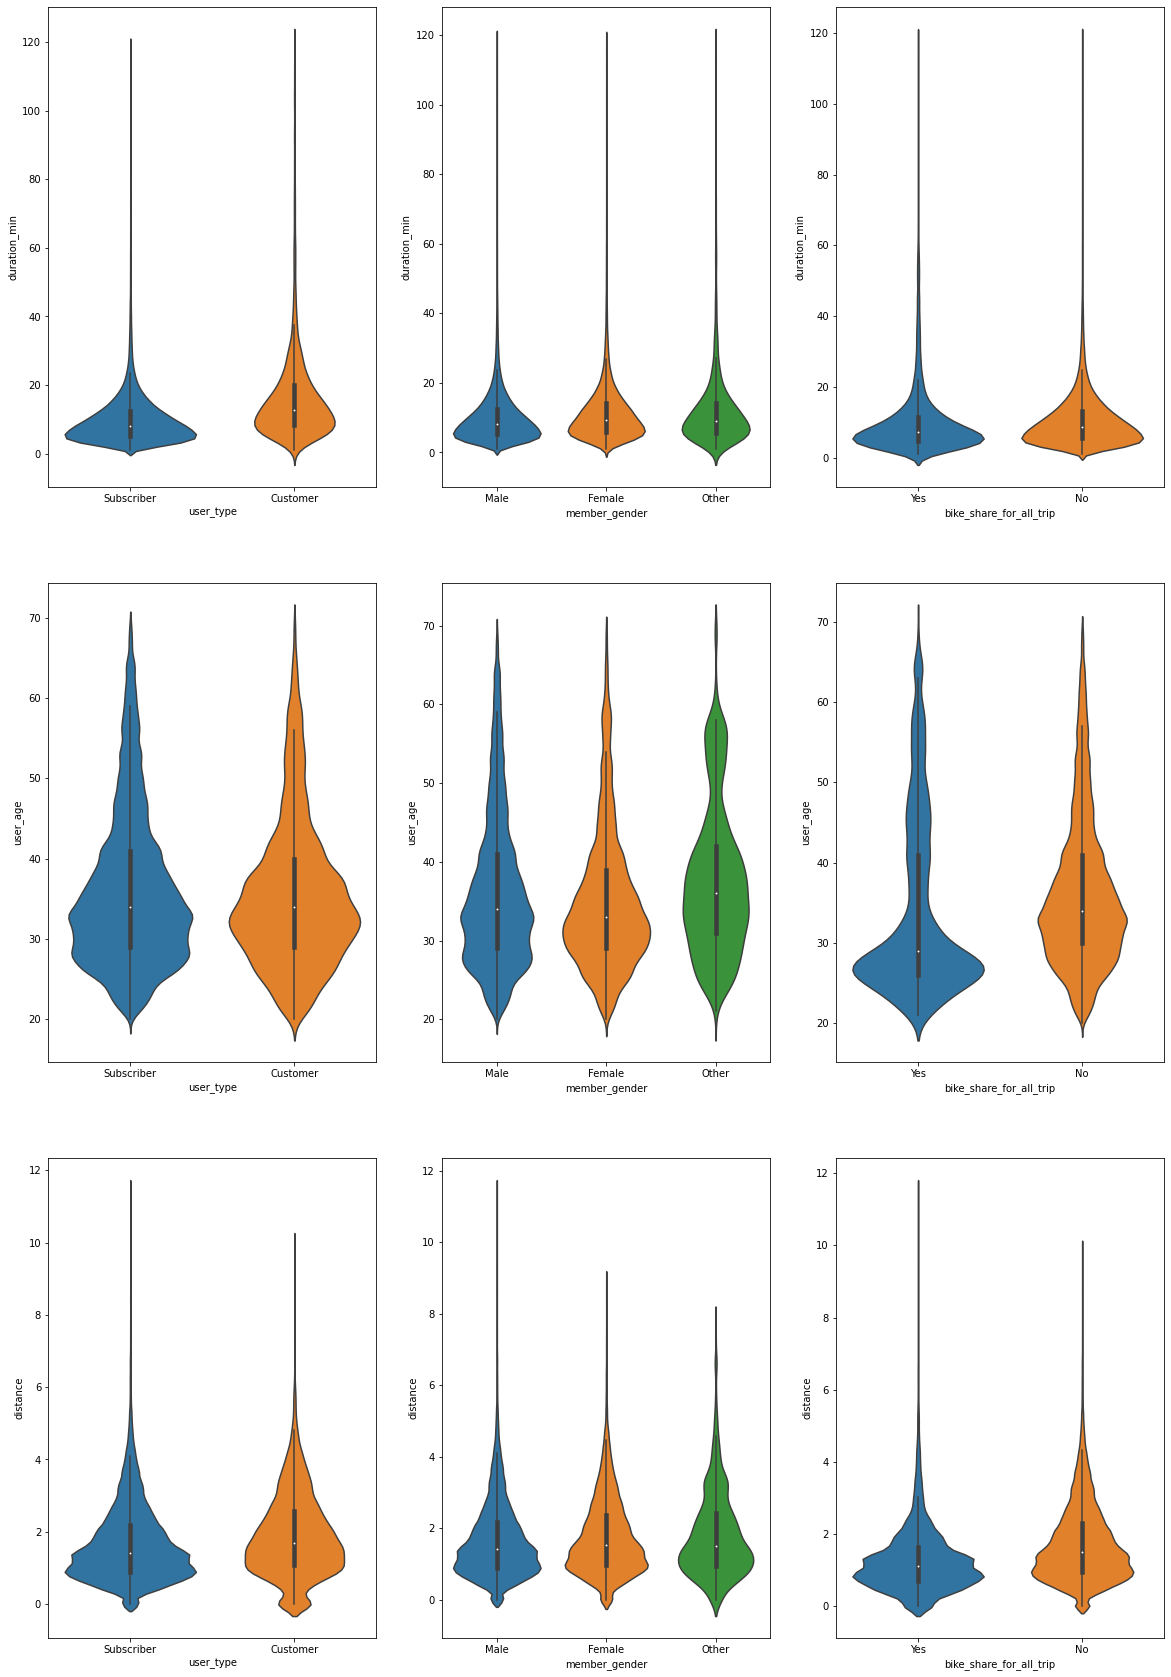

In [38]:
# Let's do the same but with violon plots to add information about distribution

numeric_variables = ['duration_min', 'user_age', 'distance']
categorical_variables = ['user_type', 'member_gender', 'bike_share_for_all_trip']
i=1
plt.figure(figsize = [20,30])
for nvariable in numeric_variables :
    for cvariable in categorical_variables :
        plt.subplot(3,3,i)
        sb.violinplot(data=df, x=cvariable, y=nvariable)
        i =i +1

It looks like it's a dead end, nothing more than using bar plots.

## Multivariate Exploration

In this section we will investigate in two directions :
* Scatter plots to check the relationship between two numerical variables over one categorcial through colour encoding (all possible combinations)
* Bar plots to compare two categorical variables over a numerical one (all possible combinations)

### Scatter plots

<Figure size 720x720 with 0 Axes>

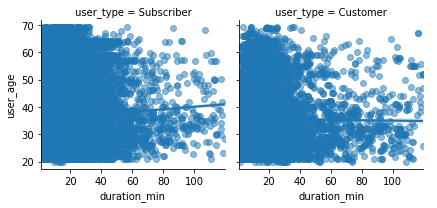

<Figure size 720x720 with 0 Axes>

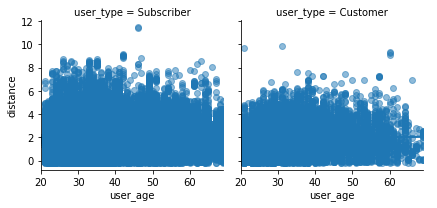

<Figure size 720x720 with 0 Axes>

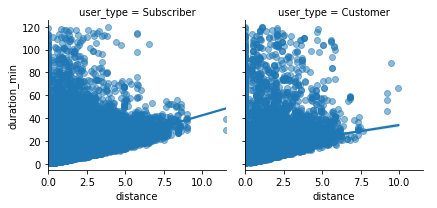

<Figure size 720x720 with 0 Axes>

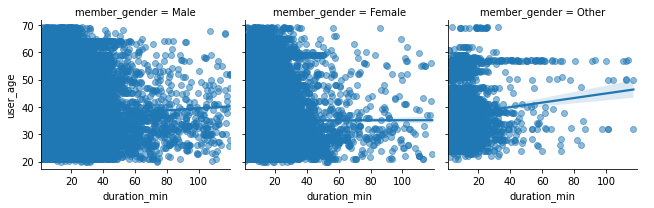

<Figure size 720x720 with 0 Axes>

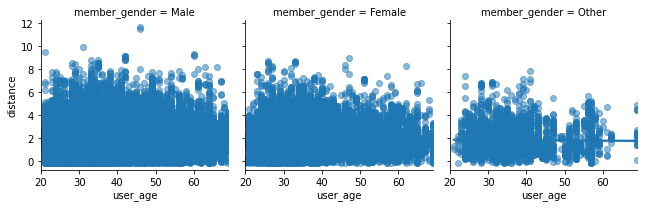

<Figure size 720x720 with 0 Axes>

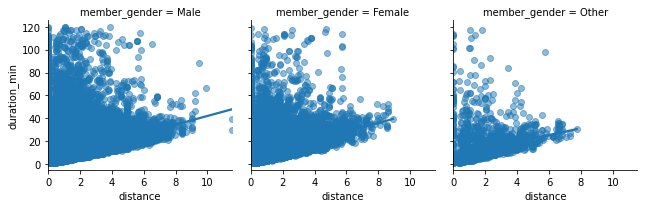

<Figure size 720x720 with 0 Axes>

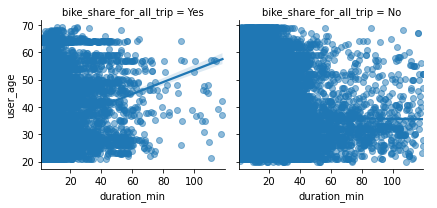

<Figure size 720x720 with 0 Axes>

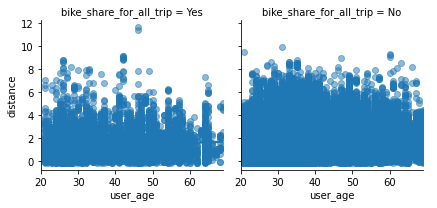

<Figure size 720x720 with 0 Axes>

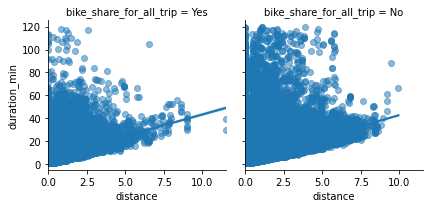

In [39]:
# Let's check all possible combinations of relationship between two numerical variables over on categorical

numeric_variables = ['duration_min', 'user_age', 'distance', 'duration_min']
categorical_variables = ['user_type', 'member_gender', 'bike_share_for_all_trip']
i=1
j=0

for cvariable in categorical_variables :
    for j in range(0,3) :
        plt.figure(figsize = [10,10])
        g = sb.FacetGrid(data=df, col=cvariable)
        g.map(sb.regplot, numeric_variables[j], numeric_variables[j+1], scatter_kws={'alpha':0.5}, y_jitter=0.2)
        g.add_legend();
        i =i +1

We can't see much with these plots, it's a dead end. We can just notice surprisingly that when the bike share is not used for all trip, the usage is broader in terms of user age, duration and distance. Can we see better with bar plots (1 numerical and 2 categorical variables) ?

### Bar plots

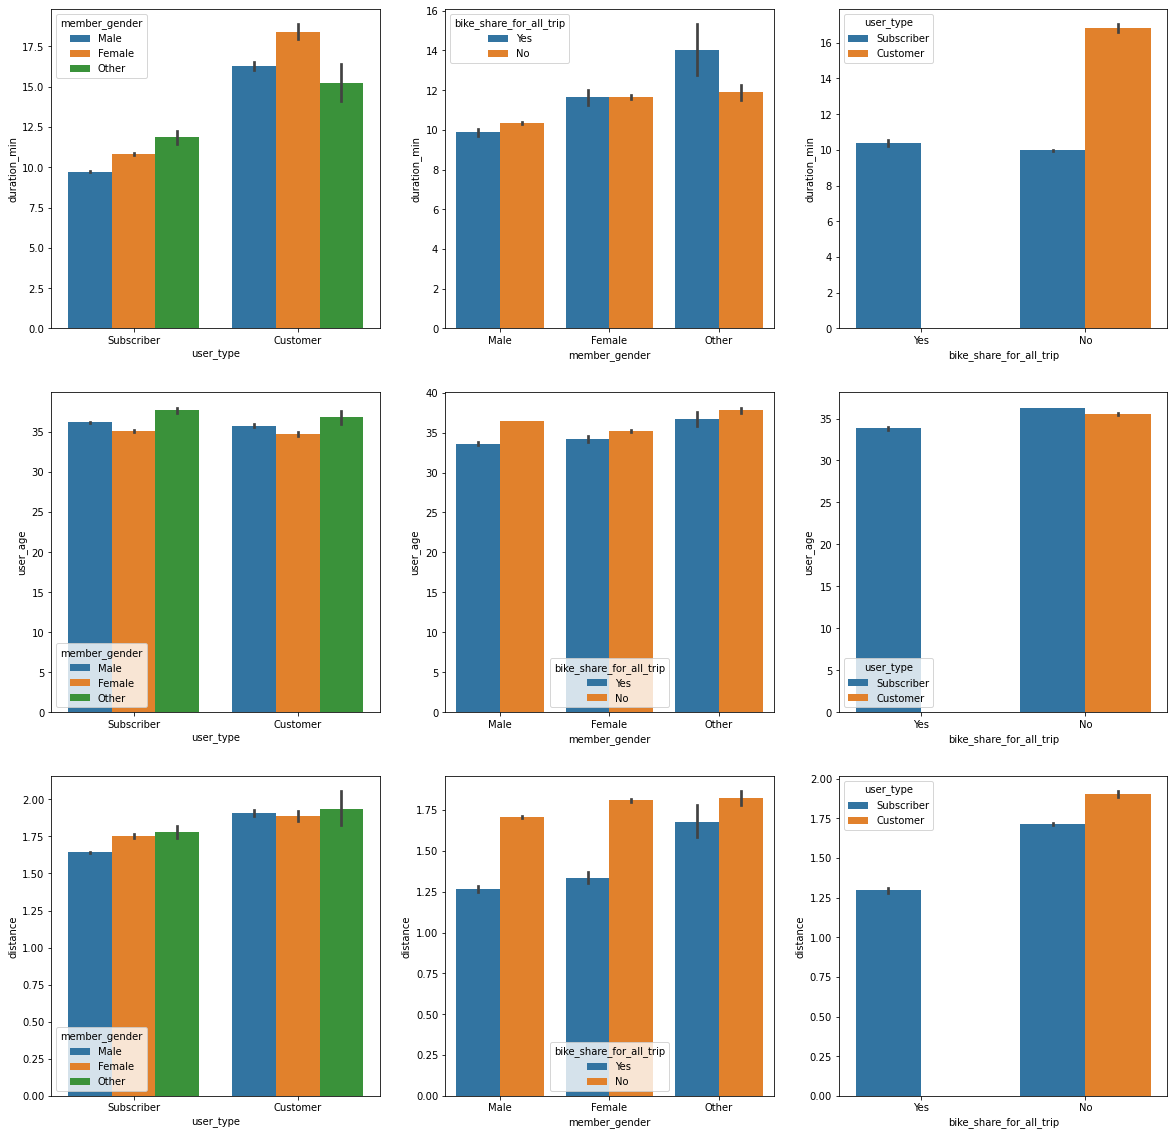

In [40]:
# Let's check all possible combinations of relationship between two categorical variables over on numerical
#Ignore warnings generated
import warnings
warnings.filterwarnings('ignore')

i=1
numeric_variables = ['duration_min', 'user_age', 'distance']
categorical_variables = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'user_type']

plt.figure(figsize = [20,20])
for nvariable in numeric_variables :
    for j in range(0,3) :
        plt.subplot(3,3,i)
        sb.barplot(data=df, x=categorical_variables[j], y=nvariable,
                   hue=categorical_variables[j+1])
        i=i+1

The only two intersting bar plots were the subplot 1.
In the subplot 1 we can see significant difference between subscribers and customers in terms of duration of use.

You will find the summary of findings in the readme file and a presentation of the interesting findings with polished vizualisations in the slide_deck_template.